# dt CDF

In [6]:
import os
from glob import glob

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.pandas  # noqa

#
import pynsitu as pin
from pynsitu.maps import crs

from lib import raw_dir, root_dir, images_dir, KEYS, color

In [7]:
# drifters
campaign="drifters_CSWOT_BIOSWOT_UWA"
yaml = f"{campaign}.yaml"
cp = pin.Campaign(os.path.join(root_dir,yaml))

____
# For ogs and scripps find change

In [8]:
df_ = df[df.time>pd.to_datetime('2023-05-22 00:00:00')].reset_index().set_index('time')
df_ = df_[df_.dt<3800]
df_['dt_dt'] =df_.dt.diff()
#df_[df_.dt_dt == df_.dt_dt.max()]

In [ ]:
df_h = df[df.time<cut_date[key]].reset_index().set_index('time').dt
df_b = df[df.time>cut_date[key]].reset_index().set_index('time').dt

In [9]:
#df_h.plot()

In [10]:
#df_b.plot()

Text(0, 0.5, 'dt[s]')

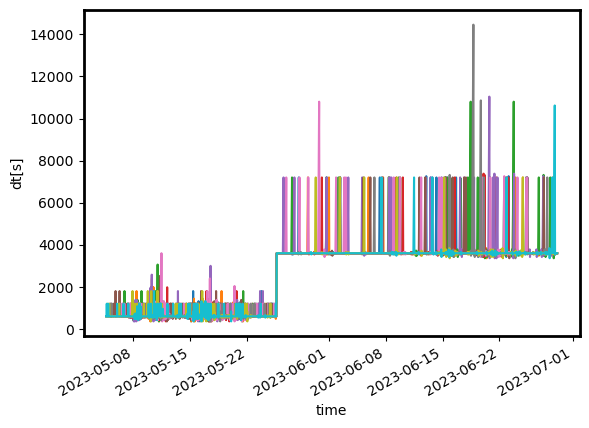

In [78]:
for id_ in df.index.unique():
    df.loc[id_].set_index('time').dt.plot()
plt.ylabel('dt[s]')

____
# Plot dt

0
0
0
0
0
0
0
0
0


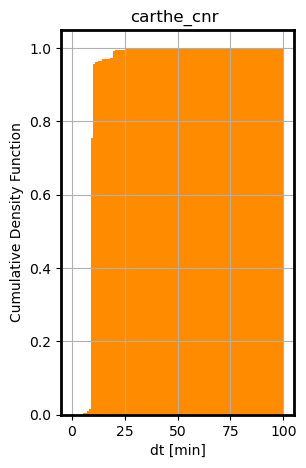

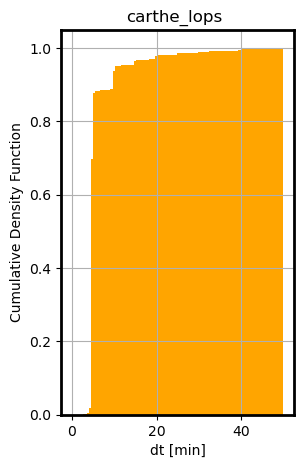

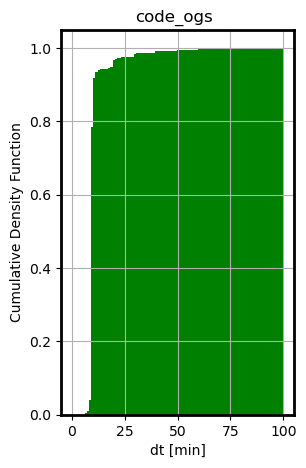

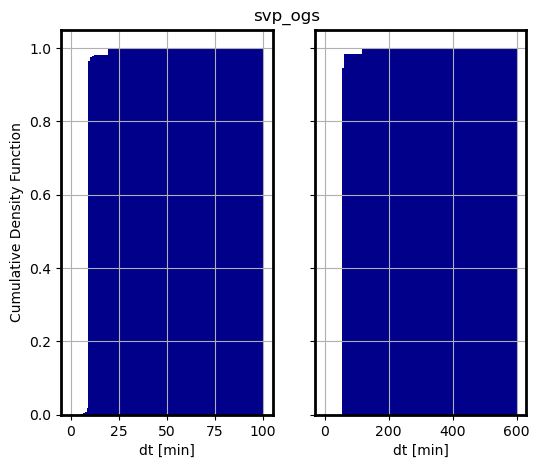

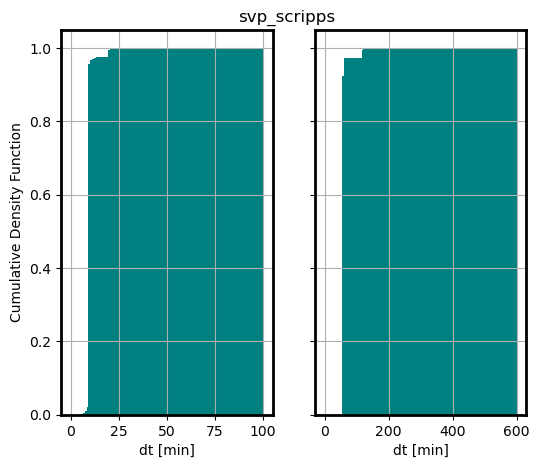

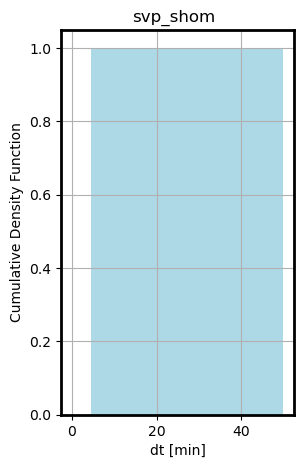

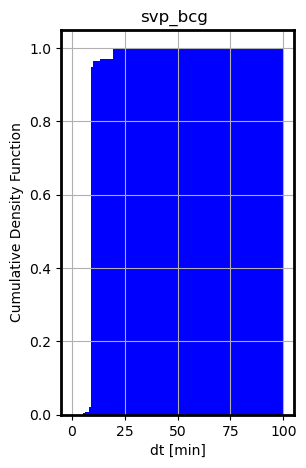

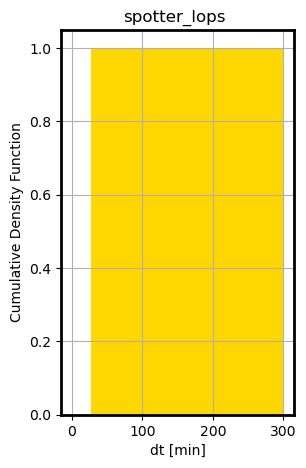

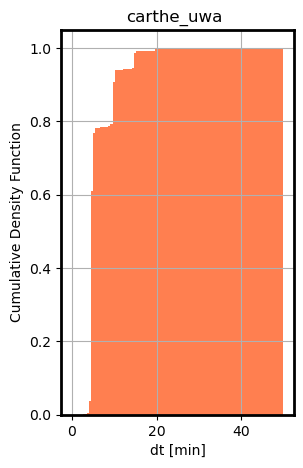

In [16]:
cut_date = {'svp_scripps' : pd.to_datetime('2023-05-30 18:00:00'), 
            'svp_ogs' : pd.to_datetime('2023-05-25 15:00:00'),}
for key in KEYS:
    try :
        color = cp[key +'_00']['color']
        df = pd.read_csv(glob(os.path.join(raw_dir, 'L1_' + key+'*'))[0], parse_dates = ['time'], dtype={"id":'string'}).set_index('id')
    except:
        continue
    if key == 'svp_ogs' or key=='svp_scripps' :
        fig, ax = plt.subplots(1,2, figsize = (6,5), sharey=True)
        df_ = df[df.time<cut_date[key]]
        _df = df[df.time>cut_date[key]]
        (df_.dt/60).hist(bins = np.linspace(0, round(10*df_.dt.median()/60), 100),cumulative=True, color=color, density=True, ax=ax[0])
        (_df.dt/60).hist(bins = np.linspace(0, round(10*_df.dt.median()/60), 100),cumulative=True, color=color, density=True, ax=ax[1])
        ax[0].set_xlabel('dt [min]')
        ax[1].set_xlabel('dt [min]')
        ax[0].set_ylabel('Cumulative Density Function')
    else : 
        fig, ax = plt.subplots(1,1, figsize = (3,5))
        (df.dt/60).hist(bins = np.linspace(0, round(10*df.dt.median()/60), 100),cumulative=True, color=color, density=True, ax=ax)
        ax.set_xlabel('dt [min]')
        ax.set_ylabel('Cumulative Density Function')
    fig.suptitle(key, y=0.92)
    fig.savefig(os.path.join(images_dir, 'dt_'+key+'.png'))
    print(0)
    

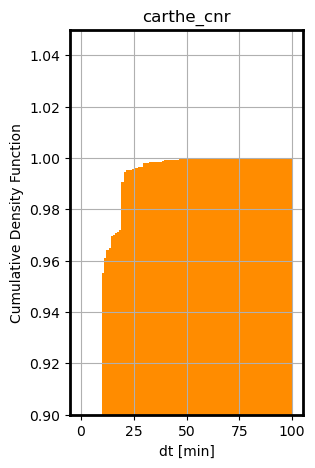

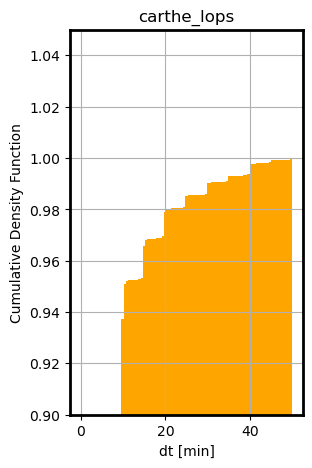

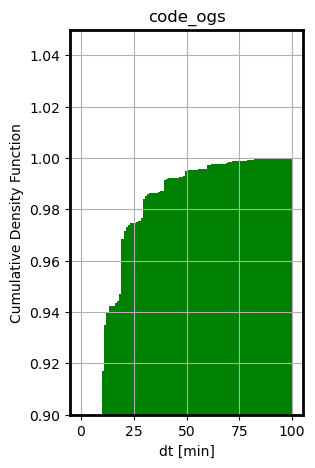

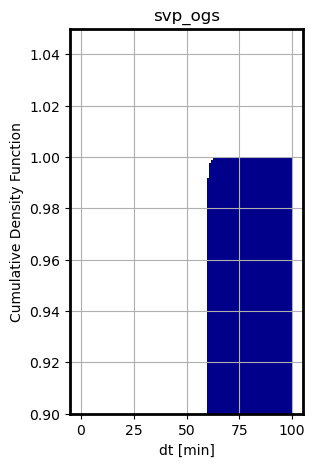

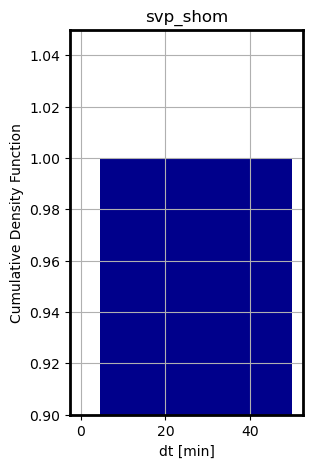

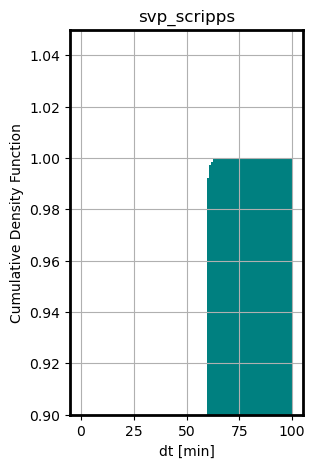

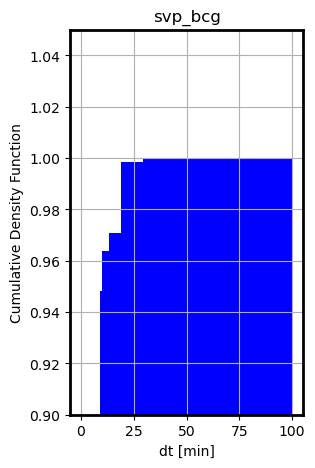

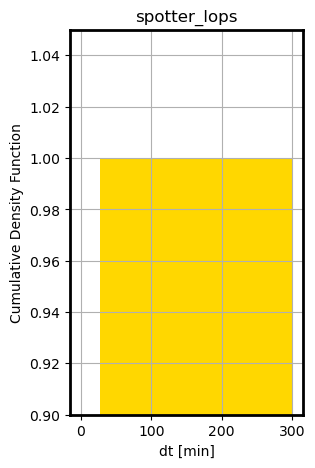

In [6]:
for key in KEYS:
    try :
        color = cp[key +'_00']['color']
        df = pd.read_csv(glob(os.path.join(raw_dir, 'L1_' + key+'*'))[0], parse_dates = ['time'], dtype={"id":'string'}).set_index('id')
    except:
        continue
    fig, ax = plt.subplots(1,1, figsize = (3,5))
    (df.dt/60).hist(bins = np.linspace(0, round(10*df.dt.median()/60), 100),cumulative=True, color=color, density=True, ax=ax)
    ax.set_title(key)
    ax.set_xlabel('dt [min]')
    ax.set_ylabel('Cumulative Density Function')
    ax.set_ylim(0.9)
    